# What Features in a House, Drive the House Price?

Moving is a pain! As someone who has moved around a lot in my young life I can tell you of all the hassle that comes with having to move to a new home. It all starts when your mom, dad, or significant other coming home to tell you they got a promotion/new job and everyone is in a good mood until they add, "But we have to move to a different state." That point marks the start of the moving process, which includes listing your house for sale for a price you think the house is worth, as well as looking for a home in your price point that has everything you want a house to have.

Finding a fair price point for a house is tough for both a buyer and seller. The seller wants to get a good return on investment(ROI) while the buyer wants a home that checks off almost everything on their list, for an affordable price. Through the back and forth negotiation of the house price, either the buyer or seller end up getting ripped off. But the question is, is how is that selling price determined? By recognizing which features in a house are "worth more" it will make the moving process a lot smoother for all parties involved.

#### I want to understand what internal features of a house contribute the most to the price of a house and create a model that will be able to predict the price of a house based on these features. 

#### Steps to achieve my goal

1) The data I am using is taken from one of the Kaggle competitions. It is in the form of a .csv file.

2) The next step is to clean the data by getting rid of any missing values and conduct outlier treatment. 

3) Then perform Exploratory Data Analysis (EDA), allowing for better understanding of relationships between variables. This step is important because the visual representation helps with seeing what type of relationships there are between features.


## Part 1

Importing data and packages. This data contains information on houses in the city of Ames, IA

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

## Part 2

In [328]:
def timeseries(df,col1,col2):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    df.groupby(col2).mean()[col1].plot(figsize=(20,7),linewidth=1,fontsize=20,color='red')
    df.groupby('age').mean()[col1].plot(figsize=(20,7),linewidth=1,fontsize=20,color='k')

    ax1.legend(loc='upper right')
    ax2.legend(loc='lower right')
    ax1.set_ylabel('Average '+ col2,fontsize=25)
    ax2.set_ylabel('Average '+ col1,fontsize=25)
    plt.xlabel('Time',fontsize=25)
    plt.xticks(rotation=45)
    plt.show()

In [347]:
df['age'] = df.YrSold - df.YearBuilt
min(df.YearBuilt)

#df.groupby('age').mean()['SalePrice'].plot()

1872

In [368]:
# df.groupby('YearBuilt').mean()['SalePrice'].plot(figsize=(20,7),linewidth=1,fontsize=20,color='red')
# df.groupby('age').mean()['SalePrice'].plot(figsize=(20,7),linewidth=1,fontsize=20,color='k')

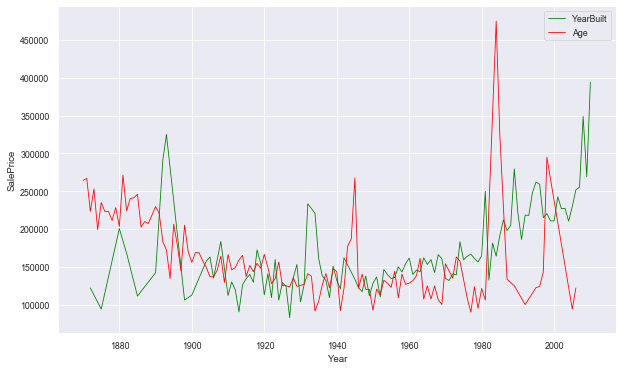

In [367]:
# Created a plot with 2 lines one for price of house sold depending on YearBuilt and the other Age of house.
sns.set('paper')
plt.figure(figsize=(10,6))
plt.plot(df.groupby('YearBuilt').mean().index,df.groupby('YearBuilt').mean()['SalePrice'],color='green',label='YearBuilt',linewidth=.8)
plt.plot(df.groupby('age').mean().index + 1870,df.groupby('age').mean()['SalePrice'],color='red',label='Age',linewidth=.8)
plt.xlabel('Year')
plt.ylabel('SalePrice')
plt.legend()

It's time to start the cleaning process of the data. Looking at a section of the data we can tell what we need to clean up, for example, the missing values in multiple columns. Also, getting the statistics of the data will help show which columns contain enough data values as well as help with the outlier treatment.

In [190]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [191]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [192]:
# Dropping columns with too few data points or missing values
df = df.drop(df.columns[[6,8,9,11,13,14,21,22,23,24,25,26,27,28,31,32,35,36,37,39,40,41,42,43,44,45,47,48,55,56,57,59,60,63,64,65,66,67,68,69,70,72,73,74,75,78,79]], axis=1)


In [193]:
# Drop all rows with any missing values
df.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,PConc,Gd,GLQ,706,856,1710,2,1,3,1,Gd,8,Attchd,2,548,0,2,2008,208500
1,2,20,RL,80.0,9600,Pave,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,CBlock,Gd,ALQ,978,1262,1262,2,0,3,1,TA,6,Attchd,2,460,0,5,2007,181500
2,3,60,RL,68.0,11250,Pave,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,PConc,Gd,GLQ,486,920,1786,2,1,3,1,Gd,6,Attchd,2,608,0,9,2008,223500
3,4,70,RL,60.0,9550,Pave,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,BrkTil,TA,ALQ,216,756,1717,1,0,3,1,Gd,7,Detchd,3,642,0,2,2006,140000
4,5,60,RL,84.0,14260,Pave,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,PConc,Gd,GLQ,655,1145,2198,2,1,4,1,Gd,9,Attchd,3,836,0,12,2008,250000
5,6,50,RL,85.0,14115,Pave,IR1,Inside,Mitchel,1Fam,1.5Fin,5,5,1993,1995,Wood,Gd,GLQ,732,796,1362,1,1,1,1,TA,5,Attchd,2,480,0,10,2009,143000
6,7,20,RL,75.0,10084,Pave,Reg,Inside,Somerst,1Fam,1Story,8,5,2004,2005,PConc,Ex,GLQ,1369,1686,1694,2,0,3,1,Gd,7,Attchd,2,636,0,8,2007,307000
8,9,50,RM,51.0,6120,Pave,Reg,Inside,OldTown,1Fam,1.5Fin,7,5,1931,1950,BrkTil,TA,Unf,0,952,1774,2,0,2,2,TA,8,Detchd,2,468,0,4,2008,129900
9,10,190,RL,50.0,7420,Pave,Reg,Corner,BrkSide,2fmCon,1.5Unf,5,6,1939,1950,BrkTil,TA,GLQ,851,991,1077,1,0,2,2,TA,5,Attchd,1,205,0,1,2008,118000
10,11,20,RL,70.0,11200,Pave,Reg,Inside,Sawyer,1Fam,1Story,5,5,1965,1965,CBlock,TA,Rec,906,1040,1040,1,0,3,1,TA,5,Detchd,1,384,0,2,2008,129500


COLUMN NAME AND DESCRIPTIONS:


SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PoolArea: Pool area in square feet

MoSold: Month Sold

YrSold: Year Sold

In [194]:
copy = df.copy()

In [195]:
#df._get_numeric_data().corr()['SalePrice']
#df.corr()['SalePrice']

# Get overview of total data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,PConc,Gd,GLQ,706,856,1710,2,1,3,1,Gd,8,Attchd,2,548,0,2,2008,208500
1,2,20,RL,80.0,9600,Pave,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,CBlock,Gd,ALQ,978,1262,1262,2,0,3,1,TA,6,Attchd,2,460,0,5,2007,181500
2,3,60,RL,68.0,11250,Pave,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,PConc,Gd,GLQ,486,920,1786,2,1,3,1,Gd,6,Attchd,2,608,0,9,2008,223500
3,4,70,RL,60.0,9550,Pave,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,BrkTil,TA,ALQ,216,756,1717,1,0,3,1,Gd,7,Detchd,3,642,0,2,2006,140000
4,5,60,RL,84.0,14260,Pave,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,PConc,Gd,GLQ,655,1145,2198,2,1,4,1,Gd,9,Attchd,3,836,0,12,2008,250000


In [196]:
# This gives us a threshold value for each variable and all data points above these values are considered outliers. 
d = df.describe(percentiles=[.25,.5,.75,.95])
iqr = d.loc['75%'] - d.loc['25%']
r = (d.loc['75%'] - iqr*1.5, d.loc['75%'] + iqr*1.5)
r

(Id                  1.000
 MSSubClass         -5.000
 LotFrontage        48.500
 LotArea          5529.500
 OverallQual         4.000
 OverallCond         4.500
 YearBuilt        1931.000
 YearRemodAdd     1948.500
 BsmtFinSF1       -356.125
 TotalBsmtSF       544.500
 GrLivArea         805.875
 FullBath            0.500
 HalfBath           -0.500
 BedroomAbvGr        1.500
 KitchenAbvGr        1.000
 TotRmsAbvGrd        4.000
 GarageCars          0.500
 GarageArea        213.750
 PoolArea            0.000
 MoSold              3.500
 YrSold           2006.000
 SalePrice       87962.500
 dtype: float64, Id                2189.500
 MSSubClass         145.000
 LotFrontage        111.500
 LotArea          17673.500
 OverallQual         10.000
 OverallCond          7.500
 YearBuilt         2069.000
 YearRemodAdd      2059.500
 BsmtFinSF1        1780.625
 TotalBsmtSF       2052.000
 GrLivArea         2747.625
 FullBath             3.500
 HalfBath             2.500
 BedroomAbvGr         4.50

In [197]:
df.describe(percentiles=[.25,.5,.75,.95])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,1057.429452,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,472.980137,2.758904,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,438.705324,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,213.804841,40.177307,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,795.750000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,334.500000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,991.500000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,480.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,1298.250000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,1274.000000,1753.000000,2466.100000,2.000000,1.000000,4.000000,1.000000,10.000000,3.000000,850.100000,0.000000,11.000000,2010.000000,326100.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,6110.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,738.000000,12.000000,2010.000000,755000.000000


In [198]:
# Performing outlier treatment and capping outlier values at the threshold value of each variable
df.LotFrontage = np.where(df.LotFrontage > 143,143,df.LotFrontage)
#d = df[(df.SalePrice <= 466075.00) & (df.LotArea <= 17673.5)]
df.SalePrice = np.where(df.SalePrice > 466075.00, 466075.00, df.SalePrice)
df.LotArea = np.where(df.LotArea > 23745.50, 23745.50, df.LotArea)
df.BsmtFinSF1 = np.where(df.BsmtFinSF1 > 2849, 2849, df.BsmtFinSF1)
df.TotalBsmtSF = np.where(df.TotalBsmtSF > 2805.75, 2805.75, df.TotalBsmtSF)
df.GarageArea = np.where(df.GarageArea == 0, 213.75, df.GarageArea)

## Part 3

Once the data has been cleaned and outlier treatment has been performed, it's time for the EDA. First, let's look at a common feature home buyers typically look at when buying a house, the lot area.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


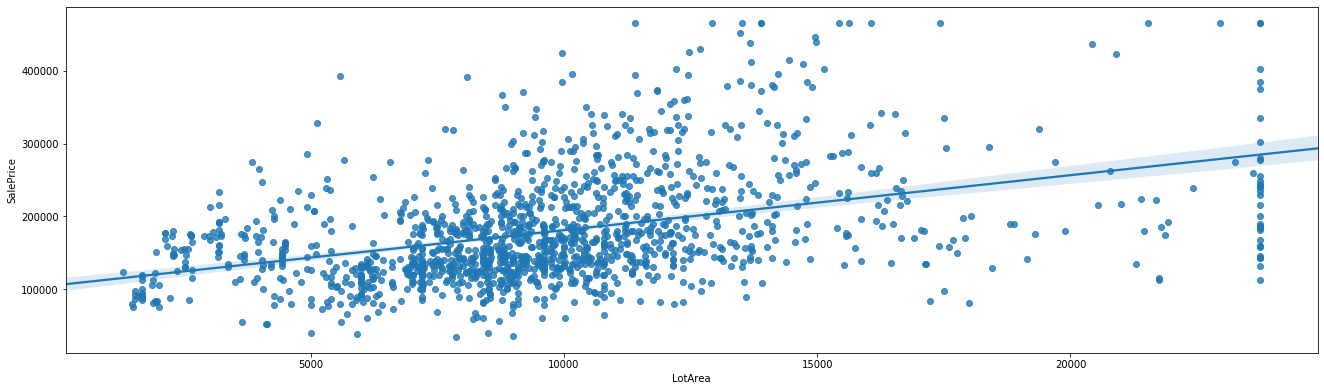

In [199]:
#plt.figure(1, figsize=(8,5))
plt.subplot(2,1,1)
#plt.figure(1, figsize=(8,5))
g = sns.regplot(x='LotArea',y='SalePrice',data=df)
g.figure.set_size_inches(18.5, 10.5)
# plt.figure(2, figsize=(8,5))
#plt.gca().set_aspect('equal', adjustable='datalim')
# plt.subplot(2,1,2)
# sns.regplot(x='LotArea',y='SalePrice',data=copy)
plt.tight_layout()

Above we see a scatter plot with a linear regression line cutting straight through with a positive slope, showing us that there is positive correlation between lot area and sale price. However, by looking at the residuals around the line, we see a little more residuals below the line of best fit, telling us there might not be a strong correlation between lot area and sale price. Let's now take a look at the correlation between variables.

In [200]:
pd.set_option('display.max_columns', None)
# This maps all the correlated values between each variables
d1 = df._get_numeric_data()
g=d1.corr()
d1 = g[(g>.5) | (g<-.5)]
d1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.000000,0.639335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,0.639335,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,0.546725,0.593007,0.550600,NaN,NaN,NaN,NaN,0.600671,0.558923,NaN,NaN,NaN,0.807288
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.537850,NaN,NaN,NaN,NaN,0.542315
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.527493
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,0.546725,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.647076


Looking at the map above, we want to see what variables have the highest correlation with sale price. We find that Overall Quality, Year Built, Year Remodel Added, Total Basement Square FT, Ground Living Area,# of Full Baths, Total Rooms Above Ground, # of Car Garages, and Garage Area have the highest correlation with sale price. 

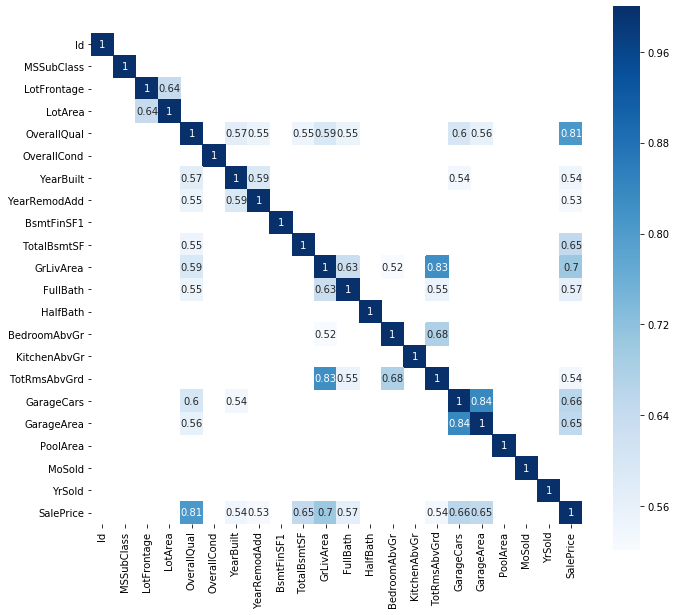

In [201]:
import seaborn as sns
plt.figure(figsize=(11,10))
sns.heatmap(d1,square=True,cmap='Blues',annot=True)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


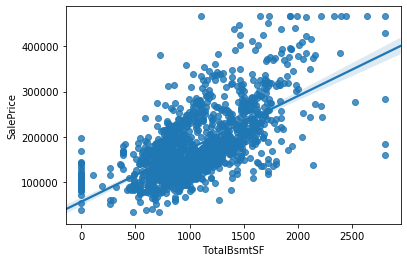

In [202]:
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=df)

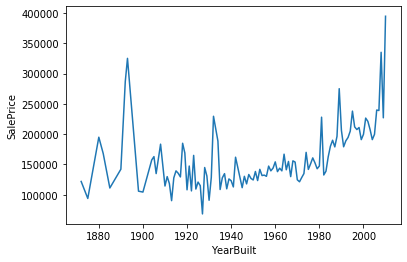

In [203]:
# This shows us a line plot that shows the median sale price of houses built in each of the years stored in the data.
m = pd.DataFrame(df.groupby('YearBuilt').median().SalePrice).reset_index()
df.groupby(['Neighborhood','YearBuilt']).SalePrice.median()
sns.lineplot(x='YearBuilt',y='SalePrice',data=m)

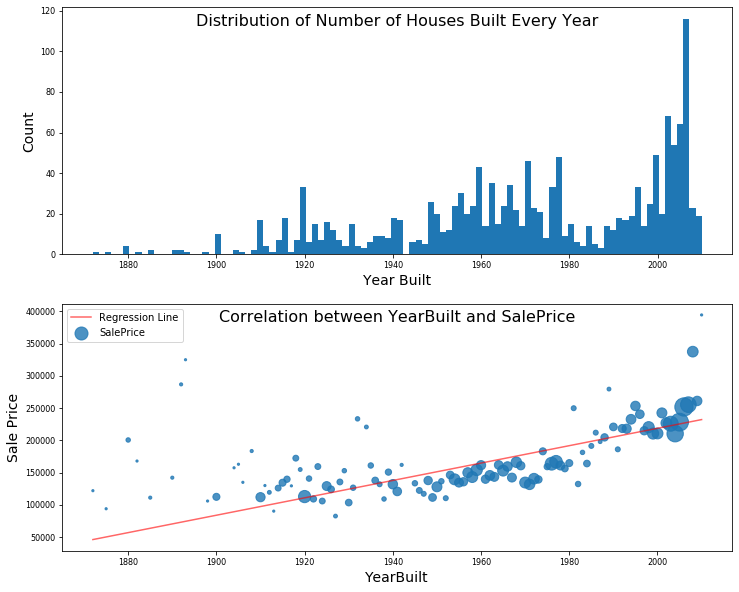

In [204]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.distplot(df.YearBuilt,bins=100,kde=False,hist_kws={"alpha":1})
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Year Built',fontsize=14)
plt.title('Distribution of Number of Houses Built Every Year',fontsize=16,y=0.9)
YearMean=df.groupby(['YearBuilt']).SalePrice.mean()
YearSize=df.groupby(['YearBuilt']).SalePrice.count()
plt.subplot(2,1,2)
plt.scatter(YearMean.index,YearMean,s=YearSize*5,alpha=0.8)


fit = np.polyfit(df.YearBuilt,df.SalePrice,deg=1)
plt.plot(YearMean.index, fit[0] * YearMean.index + fit[1], color='red',alpha=0.6)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('Sale Price',fontsize=14)
plt.xlabel('YearBuilt',fontsize=14)
plt.title('Correlation between YearBuilt and SalePrice',fontsize=16,y=0.9)
plt.legend(['Regression Line','SalePrice'])

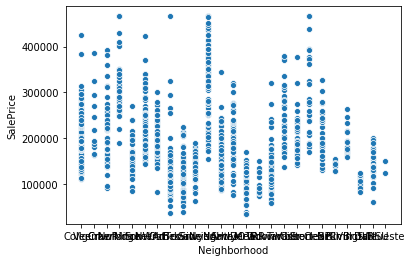

In [205]:
sns.scatterplot(df.Neighborhood,df.SalePrice)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


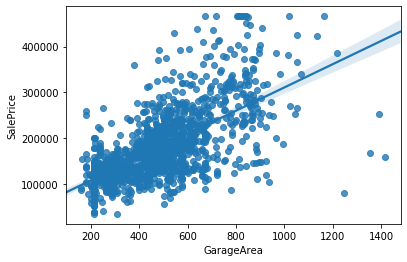

In [206]:
# This plot shows the relationship between Garage area and sale price.
sns.regplot(x='GarageArea',y='SalePrice',data=df)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


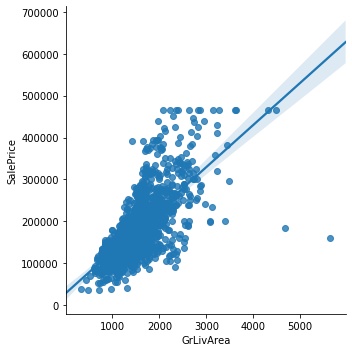

In [261]:
# This shows us the relationship between Ground living area and sale price.
sns.lmplot(x='GrLivArea',y='SalePrice',data=df)

Now that we have plotted the numerical data with the greatest correlation with sale price, let's try looking at relationships between categorical data.

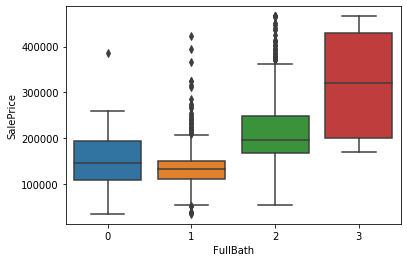

In [208]:
#This box plot shows us the relationship in sale price based on the number of full bathrooms
sns.boxplot(x='FullBath',y='SalePrice',data=df)

<Figure size 864x720 with 0 Axes>

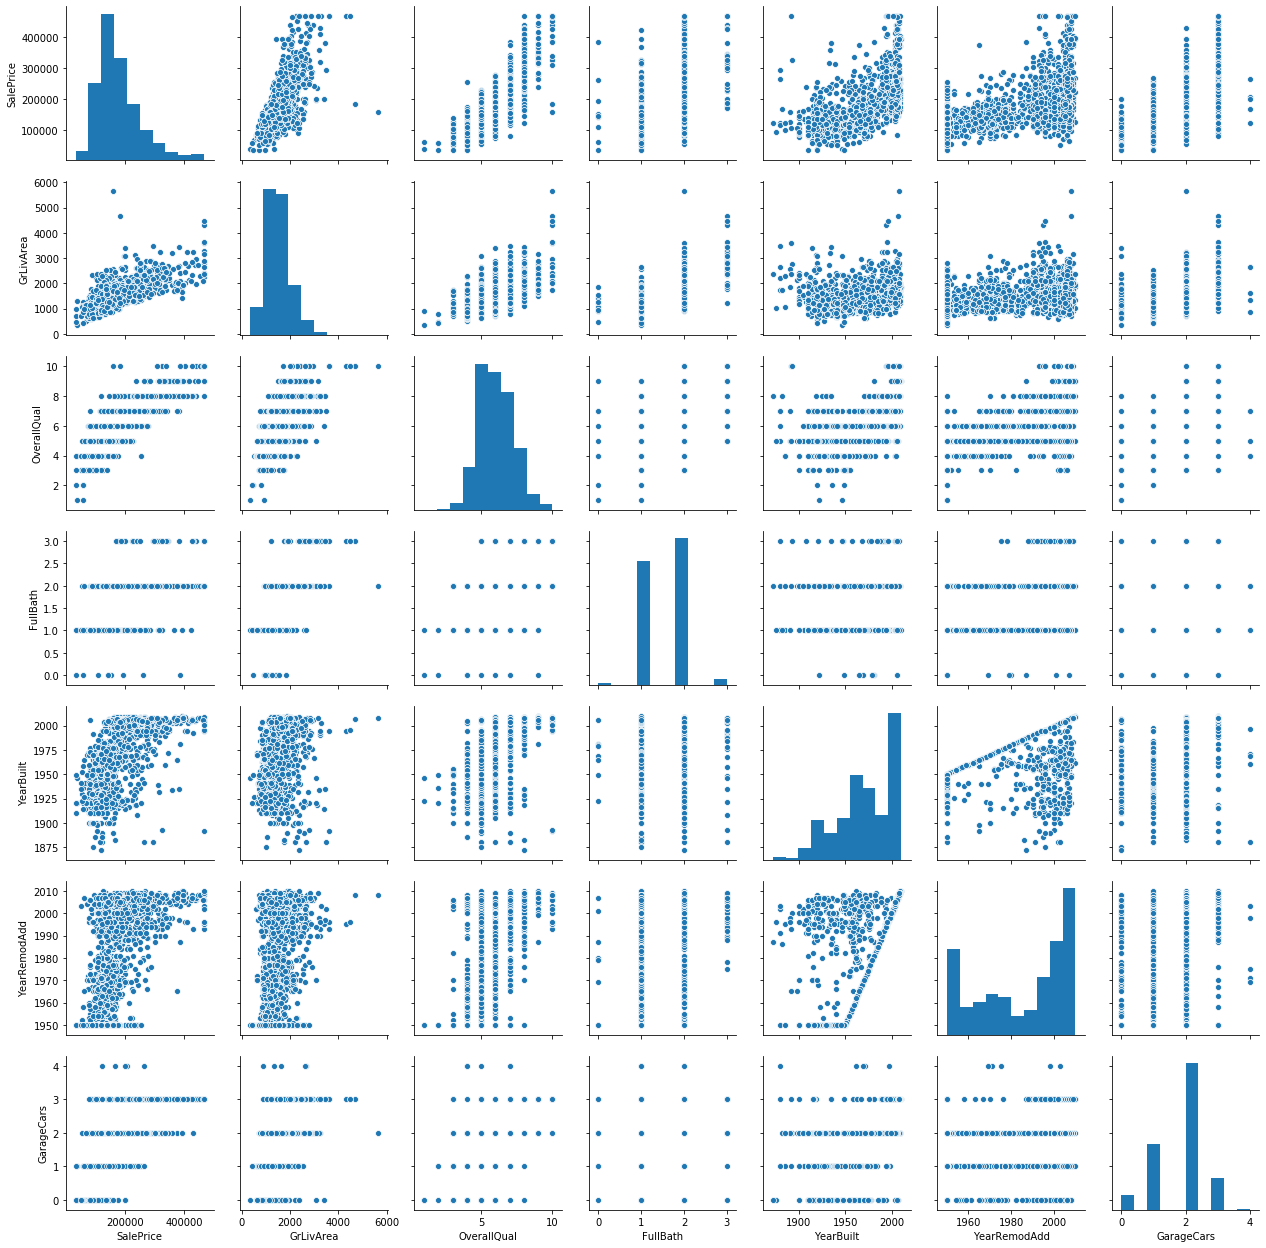

In [209]:
plt.figure(figsize=(12,10))
d = df[['SalePrice','GrLivArea','OverallQual','FullBath','YearBuilt','YearRemodAdd','GarageCars','BldgType']]
sns.pairplot(d,palette='Dark2')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


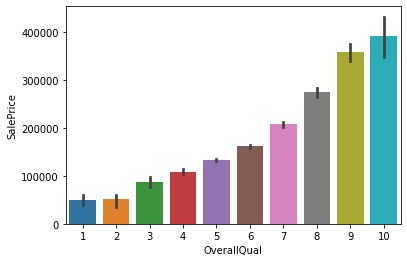

In [210]:
# This bar plot shows us the relationship of sale price based on the overall quality of a house
sns.barplot(x='OverallQual',y='SalePrice',data=df)

<Figure size 720x432 with 0 Axes>

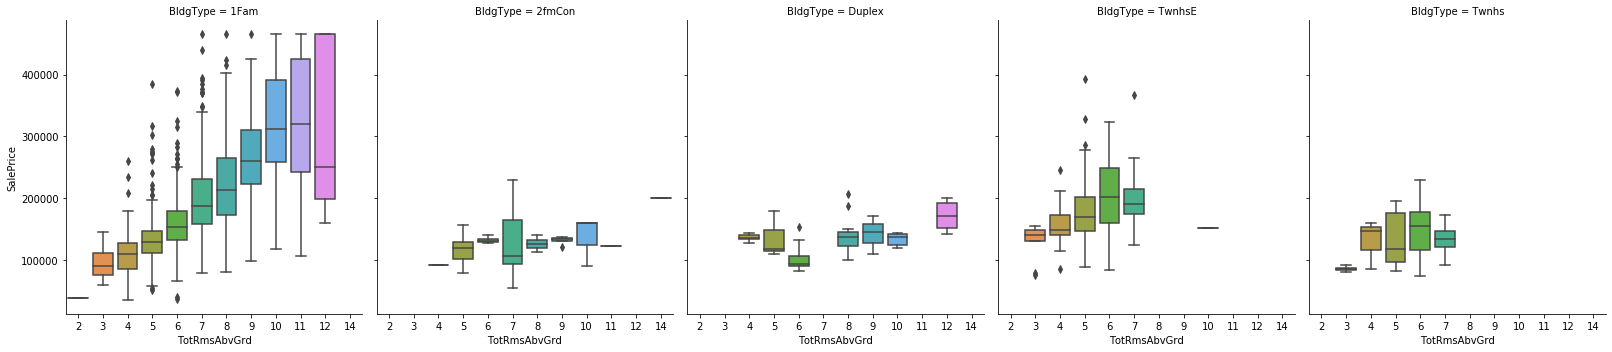

In [211]:
# This shows us sale prices of houses with a certain number of rooms above ground for each type of home, 
#for example, a 1 family home, Townhouse, 2 family home, etc.
plt.figure(figsize=(10,6))
sns.catplot(x='TotRmsAbvGrd',y='SalePrice',data=df,col='BldgType',kind='box',height=5, aspect=.9)

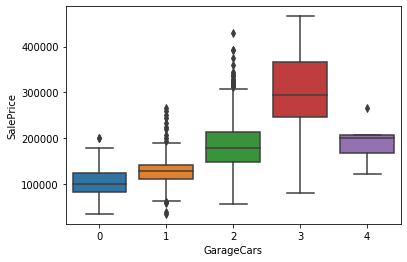

In [212]:
# This gives us a visual representation of sale prices based on the number of cars a garage can fit.
sns.boxplot(x='GarageCars',y='SalePrice',data=df)

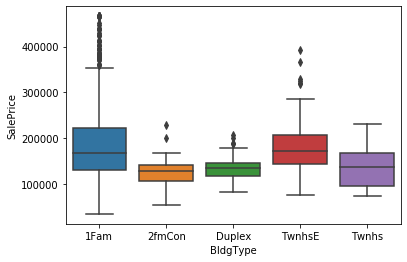

In [213]:
#Representation of sale price between each building type.
sns.boxplot(x='BldgType',y='SalePrice',data=df)

In [214]:
# Gives us the median sale price of each neighborhood in Ames,IA
df.groupby('Neighborhood')['SalePrice'].median()

Neighborhood
Blmngtn    191000.0
Blueste    137500.0
BrDale     106000.0
BrkSide    124300.0
ClearCr    200250.0
CollgCr    197200.0
Crawfor    200624.0
Edwards    121750.0
Gilbert    181000.0
IDOTRR     103000.0
MeadowV     88000.0
Mitchel    153500.0
NAmes      140000.0
NPkVill    146000.0
NWAmes     182900.0
NoRidge    301500.0
NridgHt    315000.0
OldTown    119000.0
SWISU      139500.0
Sawyer     135000.0
SawyerW    179900.0
Somerst    225500.0
StoneBr    278000.0
Timber     228475.0
Veenker    218000.0
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

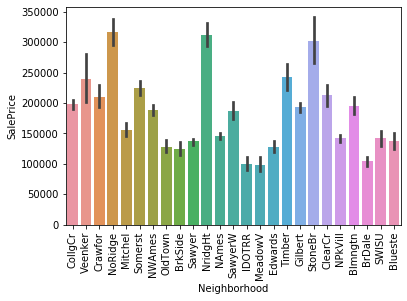

In [215]:
# visual representation of above information. We see 3 neighborhoods stand out as the highest cost of houses, 
#possibly suggesting a more wealth area.
sns.barplot(x='Neighborhood',y='SalePrice',data=df)
plt.xticks(rotation=90)

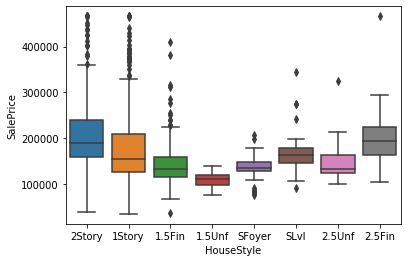

In [216]:
# This shows us the sales price of different house styles. While there is more variability in 2 story and 1 story homes,
# We can see that the median house price for a 2 story is greater than a 1 story while 2.5 unfinished story house 
# has a greater median sale price than a 1.5 unfinished story house.
sns.boxplot(x='HouseStyle',y='SalePrice',data=df)

In [217]:
# sns.heatmap(x,xticklabels=x.columns,yticklabels=x.columns,linewidths=.5,cmap='Blues',annot=True)
# fig = plt.gcf()
# fig.set_size_inches(15, 10)

In [218]:
from datetime import datetime
n = pd.DataFrame(df.groupby('YrSold')['SalePrice'].mean()).reset_index()
n.YrSold = n.YrSold.astype('str')
n.YrSold = n.YrSold.apply(lambda x: datetime.strptime(x,'%Y'))
n

,YrSold,SalePrice
0,2006-01-01,181726.668790
1,2007-01-01,184335.872340
2,2008-01-01,177360.838816
3,2009-01-01,178661.482249
4,2010-01-01,176150.777143


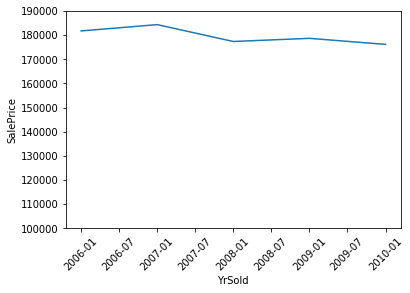

In [219]:
# Shows the mean cost a home has sold for during the specific years, and as of the end of 2009 we see a slight decline in house price.

plot = sns.lineplot(x=n.YrSold,y='SalePrice',data=n)
plot.set_ylim(100000,190000)
plot.tick_params(axis='x', rotation=45)


In the graph above, it shows how the mean sales price has gone down since 2006. Is there cause for concern here? Homeowners, buyers, and real estate investors all want to know if buying/selling in the year 2010 in the city of Ames, IA is a good idea.

Let's take a look at the data. We see below that the histogram for the Sales Price data is right skewed. Let's find the mean and standard deviation of the data. 

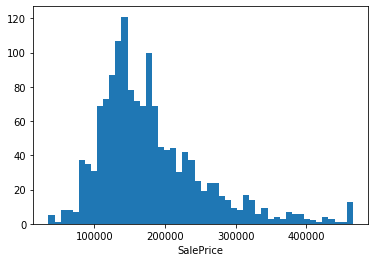

In [220]:
sns.distplot(df.SalePrice,bins=50,kde=False,hist_kws={"alpha":1})

In [221]:
print(np.mean(df.SalePrice))
print(np.std(df.SalePrice))

180027.6287671233
75026.68349108724


Homeowners, buyers, and investors are worried that in 2010 the mean house price has dropped below the true mean. This would be worrisome for investors trying to buy homes and flip them for profit and homeowners who are trying to sell. Let's assume that this data represent a random sample of sales price. We need to implement a frequentist test to find if there is something worth worrying about.

In [222]:
from scipy.stats import t
from numpy.random import seed

In [223]:
df.shape

(1460, 34)

In [224]:
tscore = t.ppf(.95,df.shape[0]-1)
tscore

1.6458986872790866

In [225]:
standard_error = np.std(df.SalePrice)/np.sqrt(df.shape[0])
standard_error

1963.5380485919657

In [226]:
margin_error = tscore * standard_error
margin_error

3231.7846966000557

In [227]:
(np.mean(df.SalePrice) - margin_error, np.mean(df.SalePrice) + margin_error)

(176795.84407052325, 183259.41346372335)

In [228]:
np.mean(df[df.YrSold == 2010].SalePrice)

176150.77714285714

In [254]:
import statsmodels as sm
from scipy.stats import ttest_ind_from_stats,ttest_ind
ttest_ind(df[df.YrSold == 2010].SalePrice,df[df.YrSold == 2006].SalePrice,equal_var = False)

Ttest_indResult(statistic=-0.7866372579095409, pvalue=0.43200679411265797)

In [255]:
ttest_ind(df[df.YrSold == 2010].SalePrice,df[df.YrSold == 2007].SalePrice,equal_var = False)

Ttest_indResult(statistic=-1.1587914448193966, pvalue=0.24730295173755276)

In [256]:
ttest_ind(df[df.YrSold == 2010].SalePrice,df[df.YrSold == 2008].SalePrice,equal_var = False)

Ttest_indResult(statistic=-0.17468805458234626, pvalue=0.8614280057291828)

In [257]:
ttest_ind(df[df.YrSold == 2010].SalePrice,df[df.YrSold == 2009].SalePrice,equal_var = False)

Ttest_indResult(statistic=-0.35569652515310096, pvalue=0.7222740244918877)

In [258]:
ttest_ind(df[df.YrSold == 2010].SalePrice,df[df.YrSold == 2010].SalePrice,equal_var = False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

We can say with 95% confidence that the true mean lies between \$176,795.84 and \$183,259.41. But the mean sales price in 2010 is $176,150.77. So homeowners and investors should be concerned since they might loose money if they try to sell their home in 2010.

## Part 4

In [234]:
X = df[['OverallQual','GarageArea','TotalBsmtSF','GrLivArea']]

In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['OverallQual','GarageArea','TotalBsmtSF','GrLivArea']])
scaled_features = scaler.transform(df[['OverallQual','GarageArea','TotalBsmtSF','GrLivArea']])

In [236]:
X = pd.DataFrame(scaled_features,columns=['OverallQual','GarageArea','TotalBsmtSF','GrLivArea'])
y=df['SalePrice']
#y= np.log(df[['SalePrice']])

In [237]:
from sklearn.cross_validation import train_test_split

In [238]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101)

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV,LassoCV,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [240]:
r = pd.concat([X,y],axis=1)
m= ols('SalePrice ~ OverallQual + GrLivArea + GarageArea + TotalBsmtSF',data=r).fit()

In [241]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1363.
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:05:24   Log-Likelihood:                -17324.
No. Observations:                1460   AIC:                         3.466e+04
Df Residuals:                    1455   BIC:                         3.468e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      1.8e+05    902.811    199.408      

In [242]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

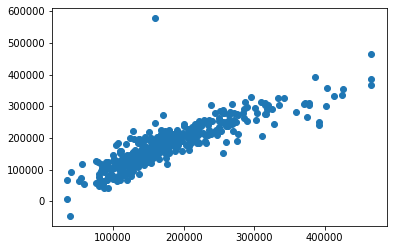

In [243]:
plt.scatter(y_test,y_pred)

In [244]:
from sklearn import metrics

In [245]:
r2 = metrics.r2_score(y_test,y_pred)
r2_adj = r2 - (1 - r2)*(4/(len(y_pred) - 4 - 1))
r2_adj

0.73513508545164

In [246]:
from sklearn.svm import LinearSVR,SVR
from sklearn.model_selection import GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)
lm = SVR()
svr = GridSearchCV(SVR(),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3,1e8],
                               "gamma": np.logspace(-2, 2, 5)})
svr.fit(scaled_features,y_train)
scaler = StandardScaler()
scaler.fit(X_test)
scaled_features = scaler.transform(X_test)
y_pred = svr.predict(scaled_features)

In [247]:
svr.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 10.0, 100.0, 1000.0, 100000000.0], 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [251]:
print(svr.best_params_)
pred = svr.predict(X_train)
r2 = metrics.r2_score(y_train,pred)
r2_adj = r2 - (1 - r2)*(4/(len(pred) - 4 - 1))
r2_adj

{'C': 100000000.0, 'gamma': 0.01}


0.8491191170931588

Text(0, 0.5, 'Predicted Sales Price')

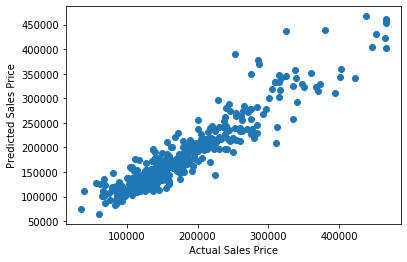

In [250]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')

In [95]:
r2 = metrics.r2_score(y_test,y_pred)
r2_adj = r2 - (1 - r2)*(4/(len(y_pred) - 4 - 1))
r2_adj


0.8719782771240927

In [96]:
lm = RandomForestRegressor(n_estimators=20)

In [97]:
lm.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
#lm.intercept_

In [59]:
#cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [60]:
#cdf

In [61]:
predictions = lm.predict(X_test)
predictions

array([130430.        , 342769.55      , 124030.        , 178995.        ,
       300060.75      ,  74105.        , 206581.25      , 151488.75      ,
        74105.        , 128122.6       , 172452.5       , 120835.        ,
       111540.625     , 223570.        , 179420.        , 120636.25      ,
       197245.        , 126785.        , 137000.        , 211833.        ,
       168900.        , 229270.65      , 160440.        , 115437.5       ,
       196963.2       , 160590.        , 175579.1       , 115975.        ,
       191520.        , 192355.5       , 126980.        , 236884.95      ,
       170307.5       , 113462.5       , 269603.        , 139860.        ,
       159360.        , 200430.        , 292508.35      , 101150.        ,
       149166.65      , 224131.25      , 114625.        , 363423.35      ,
       151200.        , 206067.        , 118950.        , 123680.        ,
       418434.15      , 149558.6       , 119775.        , 186650.        ,
       110145.        , 3

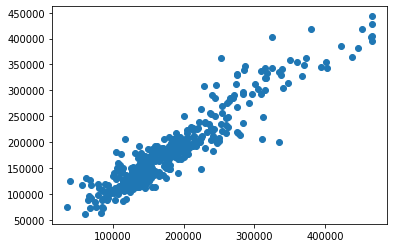

In [62]:
plt.scatter(y_test,predictions)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


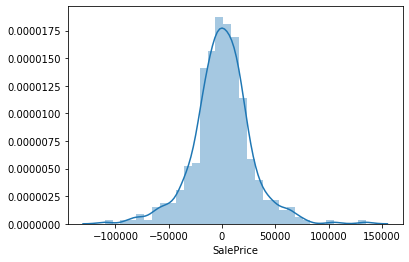

In [63]:
sns.distplot((y_test - predictions))

In [64]:
from sklearn import metrics

In [65]:
metrics.mean_absolute_error(y_test,predictions)

19690.49671096978

In [66]:
metrics.mean_squared_error(y_test,predictions)

740502847.7429825

In [67]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

27212.181973207928

In [80]:
r2 = metrics.r2_score(y_test,predictions)
r2_adj = r2 - (1 - r2)*(4/(len(predictions) - 4 - 1))
r2_adj

0.8682367847188673

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df.head()

In [ ]:
sns.distplot(np.log(df[['SalePrice']]))

In [ ]:
df.head()

In [ ]:
# abc = pd.get_dummies(df.dropna(),drop_first=True)
# X = abc.drop('SalePrice',axis=1)
# y=abc['SalePrice']
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101)

In [106]:
rf = RandomForestRegressor()#n_estimators=20)
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20,50,70,100]
}
gs = GridSearchCV(rf,param_grid,cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [20, 50, 70, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
gs.fit(X_train,y_train)
pred = gs.predict(X_train)

In [109]:
r2 = metrics.r2_score(y_train,pred)
r2_adj = r2 - (1 - r2)*(4/(len(pred) - 4 - 1))
r2_adj

0.8735235583300012

In [99]:
predictions = gs.predict(X_test)

In [100]:
predictions

array([130104.80956951, 341135.39671935, 131091.87728041, 176708.04684855,
       298205.33736852,  77052.51557685, 199339.73606568, 157377.84074514,
        77052.51557685, 127924.1250842 , 155551.7540792 , 118099.04678323,
       113709.73125441, 220739.50864521, 185666.61506238, 119008.05270604,
       195031.74752544, 123553.4535098 , 132885.18602421, 204470.04421942,
       163165.7306375 , 229380.14667523, 164040.40116526, 120302.5868562 ,
       205537.28555767, 161090.00535653, 176101.35072234, 108899.75589921,
       180400.91284923, 185894.21441385, 126648.29906944, 236516.03174787,
       194799.73766303, 108909.29383587, 263087.4265657 , 147876.03786667,
       165407.41844774, 201115.01678306, 313756.74281609, 105042.79175432,
       144668.30467216, 226777.37759436, 116971.17201398, 348430.2686684 ,
       141929.94044816, 183307.87642945, 120163.40798699, 127699.66597752,
       381613.49957333, 138070.15224958, 114284.45137768, 201740.23258657,
       117382.81590969, 3

Text(0, 0.5, 'Predicted Sales Price')

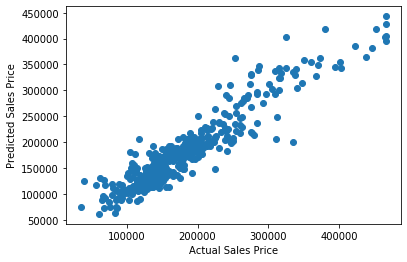

In [252]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')

In [102]:
metrics.mean_squared_error(y_test,predictions)

721882237.5554947

In [103]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

26867.866263540443

In [104]:
r2 = metrics.r2_score(y_test,predictions)
r2_adj = r2 - (1 - r2)*(4/(len(predictions) - 4 - 1))
r2_adj

0.8787272517961469

In [ ]:
#X = abc[['GrLivArea','OverallQual','GarageArea','TotalBsmtSF','GrLivArea','FullBath','YearBuilt']]

In [ ]:
sns.pairplot(X)

In [ ]:
sns.heatmap(abc)

In [171]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

In [172]:
scaler = StandardScaler()
scaler.fit(df[['OverallQual','GarageArea','TotalBsmtSF','GrLivArea','FullBath']])
scaled_features = scaler.transform(df[['OverallQual','GarageArea','TotalBsmtSF','GrLivArea','FullBath']])

In [173]:
ada = GradientBoostingRegressor()
param_grid={'n_estimators':[100], 
            'learning_rate': [0.1,0.05, 0.02, 0.01], 
            'max_depth':[6,4],
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1],
           }
gb = GridSearchCV(ada,param_grid,cv=5)
gb.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [6, 4], 'min_samples_leaf': [3, 5, 9, 17], 'max_features': [1.0, 0.3, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [174]:
pred = gb.predict(X_train)

In [177]:
r2 = metrics.r2_score(y_train,pred)
r2_adj = r2 - (1 - r2)*(4/(len(pred) - 4 - 1))
r2_adj

0.8560802393886731

In [118]:
predictions = gb.predict(X_test)

Text(0, 0.5, 'Predicted Sales Price')

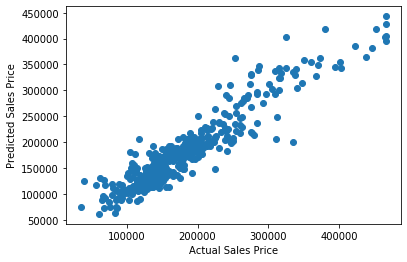

In [253]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')

In [120]:
metrics.mean_squared_error(y_test,predictions)

692079663.6908568

In [121]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

26307.407011920746

In [122]:
r2 = metrics.r2_score(y_test,predictions)
r2_adj = r2 - (1 - r2)*(4/(len(predictions) - 4 - 1))
r2_adj

0.8837339410427917

In [192]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450.0,Pave,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,PConc,Gd,GLQ,706,856.0,1710,2,1,3,1,Gd,8,Attchd,2,548.0,0,2,2008,208500.0
1,2,20,RL,80.0,9600.0,Pave,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,CBlock,Gd,ALQ,978,1262.0,1262,2,0,3,1,TA,6,Attchd,2,460.0,0,5,2007,181500.0
2,3,60,RL,68.0,11250.0,Pave,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,PConc,Gd,GLQ,486,920.0,1786,2,1,3,1,Gd,6,Attchd,2,608.0,0,9,2008,223500.0
3,4,70,RL,60.0,9550.0,Pave,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,BrkTil,TA,ALQ,216,756.0,1717,1,0,3,1,Gd,7,Detchd,3,642.0,0,2,2006,140000.0
4,5,60,RL,84.0,14260.0,Pave,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,PConc,Gd,GLQ,655,1145.0,2198,2,1,4,1,Gd,9,Attchd,3,836.0,0,12,2008,250000.0


In [200]:
df['age'] = np.log(df['YrSold'] - df['YearBuilt'])
df['age']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


0       1.609438
1       3.433987
2       1.945910
3       4.510860
4       2.079442
5       2.772589
6       1.098612
7       3.583519
8       4.343805
9       4.234107
10      3.761200
11      0.000000
12      3.828641
13      0.000000
14      3.871201
15      4.356709
16      3.688879
17      3.663562
18      1.386294
19      3.931826
20      0.000000
21      4.343805
22      1.791759
23      3.433987
24      3.737670
25      0.693147
26      4.077537
27      1.098612
28      3.891820
29      4.394449
          ...   
1430    0.000000
1431    3.496508
1432    4.382027
1433    2.079442
1434    3.367296
1435    3.828641
1436    3.583519
1437        -inf
1438    3.970292
1439    3.332205
1440    4.454347
1441    1.386294
1442    0.000000
1443    4.532599
1444    1.098612
1445    3.713572
1446    3.871201
1447    2.484907
1448    4.574711
1449    3.583519
1450    3.555348
1451    0.000000
1452    0.000000
1453        -inf
1454    1.609438
1455    2.079442
1456    3.465736
1457    4.2341

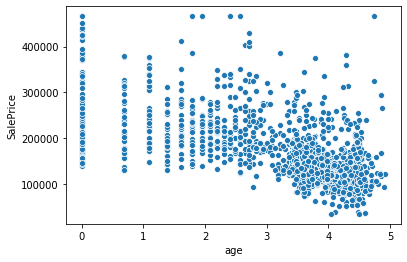

In [201]:
sns.scatterplot(df['age'],df['SalePrice'])

In [202]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice,age
Id,1.000000,0.011156,-0.024759,-0.002740,-0.028365,0.012609,-0.012713,-0.021998,-0.011083,-0.022005,0.008273,0.005587,0.006784,0.037719,0.002951,0.027239,0.016570,0.016189,0.057044,0.021172,0.000712,-0.027548,0.006572
MSSubClass,0.011156,1.000000,-0.424271,-0.347448,0.032628,-0.059316,0.027850,0.040581,-0.072738,-0.250237,0.074853,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.040110,-0.088095,0.008283,-0.013585,-0.021407,-0.087779,-0.065637
LotFrontage,-0.024759,-0.424271,1.000000,0.639335,0.252247,-0.066971,0.129893,0.082206,0.171277,0.362452,0.380503,0.205614,0.055128,0.278266,-0.002380,0.354511,0.309128,0.364158,0.125963,0.012236,0.008969,0.378181,-0.090064
LotArea,-0.002740,-0.347448,0.639335,1.000000,0.203811,-0.014912,0.049196,0.044719,0.229287,0.348291,0.433102,0.202211,0.089893,0.259535,-0.016439,0.370414,0.293043,0.337289,0.115049,-0.001489,-0.037079,0.417622,-0.001463
OverallQual,-0.028365,0.032628,0.252247,0.203811,1.000000,-0.091932,0.572323,0.550684,0.236245,0.546725,0.593007,0.550600,0.273458,0.101676,-0.183882,0.427452,0.600671,0.558923,0.065166,0.070815,-0.027347,0.807288,-0.631201
OverallCond,0.012609,-0.059316,-0.066971,-0.014912,-0.091932,1.000000,-0.375983,0.073741,-0.045689,-0.176287,-0.079686,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.185758,-0.171156,-0.001985,-0.003511,0.043950,-0.078914,0.353264
YearBuilt,-0.012713,0.027850,0.129893,0.049196,0.572323,-0.375983,1.000000,0.592855,0.253434,0.403537,0.199010,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.537850,0.474319,0.004950,0.012398,-0.013618,0.542315,-0.862830
YearRemodAdd,-0.021998,0.040581,0.082206,0.044719,0.550684,0.073741,0.592855,1.000000,0.128321,0.298620,0.287389,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.420622,0.384686,0.005829,0.021490,0.035743,0.527493,-0.640256
BsmtFinSF1,-0.011083,-0.072738,0.171277,0.229287,0.236245,-0.045689,0.253434,0.128321,1.000000,0.482351,0.181667,0.057270,-0.000925,-0.112038,-0.083082,0.031264,0.230983,0.293121,0.093951,-0.007735,0.014286,0.398019,-0.129401
TotalBsmtSF,-0.022005,-0.250237,0.362452,0.348291,0.546725,-0.176287,0.403537,0.298620,0.482351,1.000000,0.430275,0.332836,-0.057420,0.051679,-0.070966,0.278479,0.453299,0.498355,0.068376,0.023699,-0.016805,0.647076,-0.394693


In [68]:
l = range(0,5)
type(l)

range

In [130]:
df.corr().index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'PoolArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [158]:
m = np.abs(df.corr()['SalePrice']) * 100
ase = pd.DataFrame(m[:-1]).sort_values('SalePrice',ascending=False)
ase

,SalePrice
OverallQual,80.728769
GrLivArea,70.401388
GarageCars,65.821413
GarageArea,64.929032
TotalBsmtSF,64.707620
FullBath,56.706260
YearBuilt,54.231455
TotRmsAbvGrd,53.596966
YearRemodAdd,52.749339
LotArea,41.762250


Text(0, 0.5, 'Features')

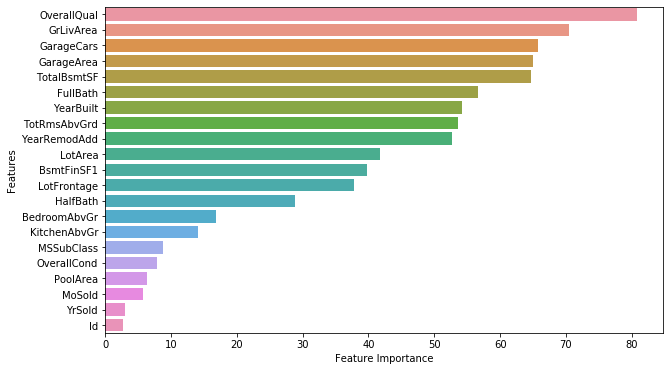

In [169]:
plt.figure(figsize=(10,6))
sns.barplot(x=ase['SalePrice'], y=ase.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')